 # Linear SVM
 
 - Create a SVM binary classifier using Iris dataset
Using the equation:
$$\frac{1}{n}\sum_{i=1}^n \max(0, 1-y_i(Ax_i-b))+\alpha||A||²$$
Where:
- $A$ Slope vector for each variable
- $b$ Intercept point
- $x = (x_1, x_2,\cdots, x_n)$ Data vector
- $y_i$ Object class (-1 or 1)
- $\alpha$ Regularization coeficient and separation softer

### Library import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
%config Completer.use_jedi = False

session = tf.Session()
iris = datasets.load_iris()

/home/juan/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/juan/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/juan/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### Data ingestion - Train/test dataset split

In [3]:
x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals = np.array([1 if y == 0 else -1 for y in iris.target])

In [4]:
train_idx = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace = False)
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))
x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]

### Tensorflow variables declaration
- Needed variables
- Loss function definition
- Accuracy metric
- Variable initilization

In [65]:
batch_size = 100    #If the number is too small the convergence would be affected

x_data = tf.placeholder(shape = [None, 2], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)

A = tf.Variable(tf.random_normal(shape = [2,1]))
b = tf.Variable(tf.random_normal(shape = [1,1]))

In [66]:
model_output = tf.subtract(tf.matmul(x_data, A), b)

In [67]:
l2_norm = tf.reduce_sum(tf.square(A))
alpha = tf.constant([0.1])
classification_term = tf.reduce_mean(tf.maximum(0.0, tf.subtract(1.0, tf.multiply(model_output, y_target))))

loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

In [68]:
prediction = tf.sign(model_output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))

In [69]:
my_optim = tf.train.GradientDescentOptimizer(0.01)
train_step = my_optim.minimize(loss)

init = tf.global_variables_initializer()
session.run(init)

In [70]:
loss_vect = []
train_acc = []
test_acc = []
for i in range(1000):
    rand_idx = np.random.choice(len(x_vals_train), size = batch_size)
    rand_x = x_vals_train[rand_idx]
    rand_y = np.transpose([y_vals_train[rand_idx]])
    session.run(train_step, feed_dict = {x_data: rand_x,
                                         y_target: rand_y})
    temp_loss = session.run(loss, feed_dict = {x_data: rand_x,
                                               y_target: rand_y})
    loss_vect.append(temp_loss)
    
    train_acc_temp = session.run(accuracy, feed_dict = {x_data: x_vals_train,
                                                        y_target: np.transpose([y_vals_train])})
    train_acc.append(train_acc_temp)
    
    test_acc_temp = session.run(accuracy, feed_dict = {x_data: x_vals_test,
                                                       y_target: np.transpose([y_vals_test])})
    test_acc.append(test_acc_temp)
    if (i+1)%50 == 0:
        print('Step #'+str(i+1)+
              ', A = '+str(session.run(A))+
              ', b = '+str(session.run(b))+
              ', Loss = '+str(temp_loss))

Step #50, A = [[-0.43457898]
 [ 0.9837983 ]], b = [[-0.02380762]], Loss = [0.9320573]
Step #100, A = [[-0.34920847]
 [ 0.66642135]], b = [[-0.06670761]], Loss = [0.96168804]
Step #150, A = [[-0.2954354 ]
 [ 0.38763022]], b = [[-0.10180759]], Loss = [0.5690424]
Step #200, A = [[-0.2314559 ]
 [ 0.15592968]], b = [[-0.13390762]], Loss = [0.7047973]
Step #250, A = [[-0.17596723]
 [-0.03316985]], b = [[-0.16260763]], Loss = [0.58269805]
Step #300, A = [[-0.1291128 ]
 [-0.20134419]], b = [[-0.1943076]], Loss = [0.7139786]
Step #350, A = [[-0.11094865]
 [-0.33283153]], b = [[-0.2203076]], Loss = [0.5928871]
Step #400, A = [[-0.08829544]
 [-0.44674328]], b = [[-0.24850762]], Loss = [0.5854683]
Step #450, A = [[-0.0759206 ]
 [-0.55411285]], b = [[-0.2762076]], Loss = [0.3866112]
Step #500, A = [[-0.05295769]
 [-0.64765227]], b = [[-0.30670756]], Loss = [0.5214215]
Step #550, A = [[-0.02163272]
 [-0.73115796]], b = [[-0.34020764]], Loss = [0.5620475]
Step #600, A = [[-0.01084229]
 [-0.803966  ]]

Text(0.5, 1.0, 'Training Loss')

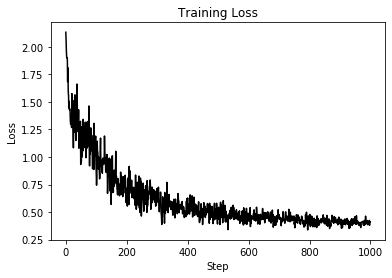

In [71]:
plt.plot(loss_vect, 'k')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')

### Linear equation

In [72]:
[[a1], [a2]] = session.run(A)
[[b]] = session.run(b)

slope = -a2/a1
y_intercept = b/a1

x1_vals = [d[1] for d in x_vals]

best_fit = []

for i in x1_vals:
    best_fit.append(slope*i + y_intercept)

setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == 1]
setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == 1]

no_setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == -1]
no_setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == -1]

Text(0.5, 1.0, 'Setosa/No setosa classification')

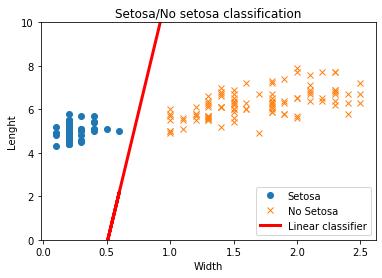

In [73]:
plt.plot(setosa_x, setosa_y, 'o', label = 'Setosa')
plt.plot(no_setosa_x, no_setosa_y, 'x', label = 'No Setosa')
plt.plot(x1_vals, best_fit, 'r-', label = 'Linear classifier', linewidth = 3)
plt.ylim([0,10])
plt.legend(loc = 'lower right')
plt.xlabel('Width')
plt.ylabel('Lenght')
plt.title('Setosa/No setosa classification')

### Metrics

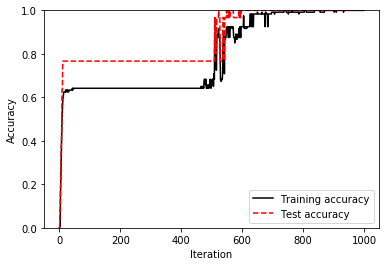

In [74]:
plt.plot(train_acc, 'k-', label = 'Training accuracy')
plt.plot(test_acc, 'r--', label = 'Test accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0,1])
plt.show()